# Question 2 - Do older planes suffer more delays?

In [1]:
#import necassary libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#read cleaned_data.csv file
cleaned_data = pd.read_csv("cleaned_data.csv")

In [3]:
#read plane-data.csv
plane_data = pd.read_csv("plane-data.csv")
#get first 5 rows of plane_data
plane_data.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#remove rows wit NAN values in coloumns tailnum and year
plane_data = plane_data.dropna(subset= ["tailnum", "year"])
plane_data.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
34,N10156,Corporation,EMBRAER,02/13/2004,EMB-145XR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004
35,N102UW,Corporation,AIRBUS INDUSTRIE,05/26/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
36,N10323,Corporation,BOEING,07/01/1997,737-3TO,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1986
37,N103US,Corporation,AIRBUS INDUSTRIE,06/18/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
38,N104UA,Corporation,BOEING,01/26/1998,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998


In [5]:
#change 'year' coloumn in plane_data to 'manufactured_year'
plane_data['manufactured_year'] = plane_data['year']
#filter out unnecessary coloumns from plane_data
plane_data = plane_data[["tailnum", "manufactured_year"]]

In [6]:
#create total delay coloumn by adding "ArrDelay" and "DepDelay" coloumns
cleaned_data["total delay"] = cleaned_data["ArrDelay"] + cleaned_data["DepDelay"]
#change 'TailNum' coloumn name to 'tailnum'
cleaned_data['tailnum'] = cleaned_data['TailNum']
#change 'Year' coloumn name to 'year_of_delay'
cleaned_data['year_of_delay'] = cleaned_data['Year']
#filter out unnecessary coloumns
cleaned_data = cleaned_data[["tailnum", "year_of_delay","total delay" ]]
cleaned_data.head()

,tailnum,year_of_delay,total delay
0,N351,2007,8.0
1,N370,2007,21.0
2,N685,2007,70.0
3,N364,2007,56.0
4,N480,2007,-2.0


In [7]:
#merge plan_data and cleaned_data and assign it to joined_data
joined_data = pd.merge(cleaned_data,plane_data , on='tailnum')
joined_data.head()

,tailnum,year_of_delay,total delay,manufactured_year
0,N611SW,2007,13.0,1995
1,N611SW,2007,40.0,1995
2,N611SW,2007,-4.0,1995
3,N611SW,2007,41.0,1995
4,N611SW,2007,42.0,1995


In [8]:
#get number of rows and coloumns in joined_data
joined_data.shape

(11919299, 4)

In [9]:
#get data types of each coloumn
joined_data.dtypes
#filter out rows where manufactured_year is 0 or 'None'
joined_data.drop(joined_data[joined_data['manufactured_year'] =='None'].index, inplace = True)
joined_data.drop(joined_data[joined_data['manufactured_year'] == '0' ].index, inplace = True)

In [10]:
#get number of rows and coloumns in joined_data
joined_data.shape

(11568559, 4)

In [11]:
#change "manufactured_year" coloumn data type to integer
joined_data["manufactured_year"] = joined_data["manufactured_year"].astype('int')

In [12]:
#calculate plane age by subtracting manufactured year from year of delay
joined_data['plane_age'] = joined_data['year_of_delay'] - joined_data['manufactured_year']
#assigning necessary coloumsn to plane_age dataframe
plane_age = joined_data[['tailnum', 'plane_age', 'total delay']]
plane_age.head()

,tailnum,plane_age,total delay
0,N611SW,12,13.0
1,N611SW,12,40.0
2,N611SW,12,-4.0
3,N611SW,12,41.0
4,N611SW,12,42.0


In [13]:
#group plane_age data by 'plane_age' and get average delay per age of plane
plane_age_grouped = plane_age.groupby(['plane_age']).mean('total delay').reset_index()
plane_age_grouped

,plane_age,total delay
0,-1,19.385762
1,0,20.298740
2,1,20.125426
3,2,20.616260
4,3,20.231051
5,4,21.495282
6,5,19.251585
7,6,18.366097
8,7,19.767286
9,8,20.719034


In [14]:
#drop rows that are irrelevant
plane_age_grouped.drop(0,axis=0,inplace=True)
plane_age_grouped.drop(52,axis=0,inplace=True)
plane_age_grouped.drop(53,axis=0,inplace=True)
plane_age_grouped


,plane_age,total delay
1,0,20.298740
2,1,20.125426
3,2,20.616260
4,3,20.231051
5,4,21.495282
6,5,19.251585
7,6,18.366097
8,7,19.767286
9,8,20.719034
10,9,22.011121


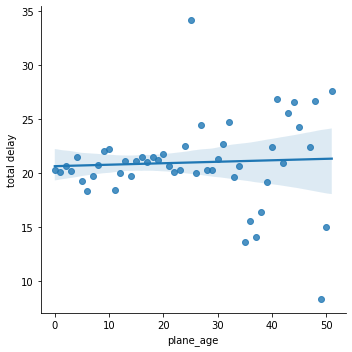

In [15]:
#plot plane_age_grouped onto a lmplot
sns.lmplot(data =plane_age_grouped , x="plane_age", y="total delay")

In [17]:
corr = plane_age_grouped['plane_age'].corr(plane_age_grouped['total delay'])
print("Correlation between the plane age and the average delay is:", corr)

Correlation between the plane age and the average delay is: 0.05248884501142356
